In [1]:
library(ggplot2)
library(dplyr)
library(lme4)
library(lmerTest)
library(glmmTMB)
library(cowplot)
library(grid)
library(car)

pallete = c("#318480", "#b4464f")

ignore <- c("augment_tied") # models not to plot



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




# Bock 1992

In [2]:
b92_wiki_df <- read.csv("../evalsets/Bock1992/items.csv.reformat")
b92_ptb_df <- read.csv("../evalsets/Bock1992/items.ptb.csv.reformat")


b92_df <- rbind(b92_ptb_df, b92_wiki_df)
b92_df <- tidyr::separate(b92_df, condition, c("nums","clause"), sep="_")
b92_df <- tidyr::separate(b92_df, nums, c("subj", "attr"), sep=1:2)

b92_df

b92_df$type <- substr(b92_df$model, 5, nchar(b92_df$model)-1)
b92_df[b92_df$model == "gpt2",]$type <- "gpt2"
b92_df$type <- as.factor(b92_df$type)
b92_df$match <- as.factor(b92_df$subj == b92_df$attr)
b92_df$subj <- as.factor(b92_df$subj)
b92_df$clause <- as.factor(b92_df$clause)

b92_df$model <- as.factor(b92_df$model)

coding_matrix <- matrix(c(1, -1), ncol=1)
contrasts(b92_df$match) <- coding_matrix
contrasts(b92_df$clause) <- coding_matrix
contrasts(b92_df$clause)
b92_df$sample <- 100 - b92_df$sample
b92_df$max <- 100 - b92_df$max


summary(b92_df)

X,item,subj,attr,clause,model,max,sample
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
0,0,s,s,prop,lstmccglm0,100,89.686165
1,0,s,s,prop,lstmccglm1,100,81.533345
2,0,s,s,prop,lstmccglm2,100,77.332087
3,0,s,s,prop,lstmccglm3,100,83.111581
4,0,s,s,prop,lstmccglm4,100,79.211191
5,0,s,s,rc,lstmccglm0,100,82.468706
6,0,s,s,rc,lstmccglm1,100,87.884256
7,0,s,s,rc,lstmccglm2,100,86.875562
8,0,s,s,rc,lstmccglm3,100,91.919093


prop,1
rc,-1


       X               item       subj         attr            clause    
 Min.   :   0.0   Min.   : 0.00   p:3200   Length:6400        prop:3200  
 1st Qu.: 799.8   1st Qu.: 7.75   s:3200   Class :character   rc  :3200  
 Median :1919.5   Median :15.50            Mode  :character              
 Mean   :2175.5   Mean   :15.50                                          
 3rd Qu.:3519.2   3rd Qu.:23.25                                          
 Max.   :5119.0   Max.   :31.00                                          
                                                                         
               model           max             sample       
 gpt2             : 256   Min.   :  0.00   Min.   : 0.2909  
 lstmaugment_tied0: 256   1st Qu.:  0.00   1st Qu.: 9.3684  
 lstmaugment_tied1: 256   Median :  0.00   Median :24.7311  
 lstmaugment_tied2: 256   Mean   : 30.16   Mean   :33.5986  
 lstmaugment_tied3: 256   3rd Qu.:100.00   3rd Qu.:56.1459  
 lstmaugment0     : 256   Max.   :100.00  

In [3]:

means <- b92_df %>% group_by(type, match, clause) %>% summarize(sample = mean(sample), max = mean(max))
means_m <- b92_df %>% group_by(model, type, match, clause) %>% summarize(sample = mean(sample), max = mean(max))

means_na <- b92_df %>% group_by(type, match, subj) %>% summarize(sample = mean(sample), max = mean(max))

means <- subset(means, !(type %in% ignore))
means_m <- subset(means_m, !(type %in% ignore))

means_na

means_na_m <- b92_df %>% group_by(model, type, match, subj) %>% summarize(sample = mean(sample), max = mean(max))


`summarise()` has grouped output by 'type', 'match'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'model', 'type', 'match'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'type', 'match'. You can override using the `.groups` argument.


type,match,subj,sample,max
<fct>,<fct>,<fct>,<dbl>,<dbl>
augment,FALSE,p,46.710498,44.375000
augment,FALSE,s,60.329700,66.875000
augment,TRUE,p,13.558443,1.250000
augment,TRUE,s,11.920083,1.250000
augment_tied,FALSE,p,42.122745,35.546875
augment_tied,FALSE,s,53.575664,57.421875
augment_tied,TRUE,p,11.425668,0.390625
augment_tied,TRUE,s,9.362090,0.390625
ccglm,FALSE,p,66.807193,81.562500


`summarise()` has grouped output by 'model', 'type', 'match'. You can override using the `.groups` argument.


In [4]:
options(repr.plot.width=4, repr.plot.height=4)


b92_human_ <- data.frame(type = rep(c("h"), 8),
                        clause=c("prop", "prop", "prop", "prop", "rc", "rc", "rc","rc"),
                        match=c(FALSE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, FALSE),
                        attr=c("S","P", "S", "P", "S", "P", "S","P"),
                        subj=c("p", "s", "s", "p", "s", "p", "p", "s"),
                        sample=c(8/188, 29/169, 3/187,6/180, 1/209, 3/199, 3/180, 22/189)
                       )
b92_human <- b92_human_ %>% group_by(type, match, clause) %>% 
                           summarize(sample = mean(sample))


b92_human$type <- as.factor(b92_human$type)
b92_human$match <- as.factor(b92_human$match)
b92_human$clause <- as.factor(b92_human$clause)
b92_human$sample <- b92_human$sample * 100
b92_human$max <- b92_human$sample
b92_human

means_human <- rbind(means, b92_human)
means_human <- subset(means_human, !(type %in% ignore))
means_human
means_human_na <- b92_human_ %>% group_by(type, match, subj) %>% 
                  summarize(sample = mean(sample))
means_human_na$type <- as.factor(means_human_na$type)
means_human_na$match <- as.factor(means_human_na$match)
means_human_na$subj <- as.factor(means_human_na$subj)
means_human_na$sample <- means_human_na$sample * 100
means_human_na$max <- means_human_na$sample
means_human_na <-rbind(means_na, means_human_na)
means_human_na

`summarise()` has grouped output by 'type', 'match'. You can override using the `.groups` argument.


type,match,clause,sample,max
<fct>,<fct>,<fct>,<dbl>,<dbl>
h,FALSE,prop,10.7075412,10.7075412
h,FALSE,rc,6.6534392,6.6534392
h,TRUE,prop,2.4688057,2.4688057
h,TRUE,rc,0.9930033,0.9930033


type,match,clause,sample,max
<fct>,<fct>,<fct>,<dbl>,<dbl>
augment,FALSE,prop,51.9049565,54.0625000
augment,FALSE,rc,55.1352421,57.1875000
augment,TRUE,prop,12.4107285,1.8750000
augment,TRUE,rc,13.0677977,0.6250000
ccglm,FALSE,prop,60.9834330,70.0000000
ccglm,FALSE,rc,64.9320637,73.4375000
ccglm,TRUE,prop,23.3043033,10.6250000
ccglm,TRUE,rc,20.0507190,9.6875000
gpt2,FALSE,prop,7.7211874,3.1250000


`summarise()` has grouped output by 'type', 'match'. You can override using the `.groups` argument.


type,match,subj,sample,max
<fct>,<fct>,<fct>,<dbl>,<dbl>
augment,FALSE,p,46.710498,44.375000
augment,FALSE,s,60.329700,66.875000
augment,TRUE,p,13.558443,1.250000
augment,TRUE,s,11.920083,1.250000
augment_tied,FALSE,p,42.122745,35.546875
augment_tied,FALSE,s,53.575664,57.421875
augment_tied,TRUE,p,11.425668,0.390625
augment_tied,TRUE,s,9.362090,0.390625
ccglm,FALSE,p,66.807193,81.562500


No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



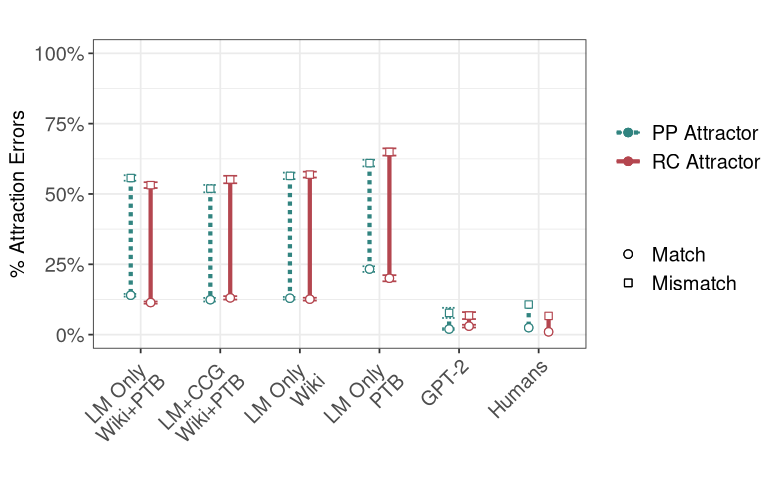

In [5]:
options(repr.plot.width=6.5, repr.plot.height=4)
model_order = c("lmaug", "augment", "wiki_lm", "augment_tied", "ccglm", "gpt2", "h")

b92_df$type <- factor(b92_df$type, levels=model_order)
b92_df <- subset(b92_df, !(type %in% ignore))

ggplot(data=b92_df, aes(x=factor(type, levels=model_order), color=clause, linetype=clause, y=sample/100)) +
geom_point(data=subset(means_human, match==TRUE), position=position_dodge(width=0.5), aes(shape="m"), size=2, fill="#FFFFFF") + 
# need ^ for the x axis order? don't ask me why tbh
stat_summary(data=subset(b92_df, match==TRUE), geom="errorbar", width=0.35, 
             position=position_dodge(width=0.5), aes(x=factor(type, levels=model_order), group=clause)) +
stat_summary(data=subset(b92_df, match==FALSE), geom="errorbar", width=0.35, 
             position=position_dodge(width=0.5), aes(x=factor(type, levels=model_order), group=clause)) +
geom_line(data=means_human, position=position_dodge(width=0.5), size=1.2) +
geom_point(data=subset(means_human, match==TRUE), 
           position=position_dodge(width=0.5), aes(shape="m"), size=2, fill="#FFFFFF") +
geom_point(data=subset(means_human, match==FALSE), 
           position=position_dodge(width=0.5), aes(shape="mm"), size=2, fill="#FFFFFF") + 
labs(x="", 
     color="", shape="", y="% Attraction Errors", title="", linetype="") +
scale_y_continuous(labels=scales::percent) +
scale_color_manual(labels=c("prop"="PP Attractor", "rc"="RC Attractor"), values=pallete) +
scale_linetype_manual(labels=c("prop"="PP Attractor", "rc"="RC Attractor"), values=c("prop"="1111", "rc"="solid")) +
scale_x_discrete(labels=c("lmaug"="LM Only \nWiki+PTB",
                          "augment"="LM+CCG \nWiki+PTB",
                          "wiki_lm"="LM Only \nWiki",
                          "augment_tied"="LM+CCG \nWIki+PTB\nTied",
                          "ccglm"="LM Only \nPTB",
                          "gpt2"="GPT-2",
                          "h"="Humans")) +
scale_shape_manual(labels=c("m"="Match",
                            "mm"="Mismatch"),
                   values=c("m"=21,
                            "mm"=22)) +
coord_cartesian(ylim = c(0.0,1.0)) +
theme_bw() +
theme(axis.text.x=element_text(size=12, angle=45, hjust=1), axis.text.y=element_text(size=12),
      axis.title.y=element_text(size=12), axis.title.x=element_text(size=10),
      strip.text=element_text(size=12), legend.text=element_text(size=12))


ggsave("plots/Bock_all.png", width= 6.5, height = 4)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 24 row(s) containing missing values (geom_path).”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 24 row(s) containing missing values (geom_path).”


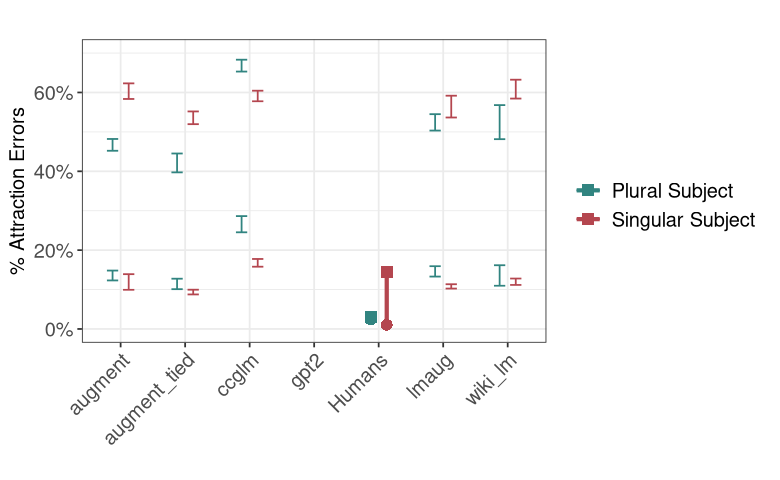

In [9]:
options(repr.plot.width=6.5, repr.plot.height=4)
model_order = c("l", "a", "w", "c", "h")

ggplot(data=b92_df, aes(x=factor(type, levels=model_order), color=subj, y=sample/100)) +
#geom_bar(stat="summary", fun = mean, fill="#566e4b", width=0.6) + 
geom_point(data=subset(means_human_na, match==TRUE), position=position_dodge(width=0.5), shape=16, size=3) +
geom_point(data=subset(means_human_na, match==FALSE), position=position_dodge(width=0.5), shape=15, size=3) + 
stat_summary(data=subset(means_na_m, match==TRUE), geom="errorbar", width=0.35, position=position_dodge(width=0.5), aes(x=type, group=subj)) +
stat_summary(data=subset(means_na_m, match==FALSE), geom="errorbar", width=0.35, position=position_dodge(width=0.5), aes(x=type, group=subj)) +
geom_line(data=means_human_na, position=position_dodge(width=0.5), size=1.2) +
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="", 
     color="", y="% Attraction Errors", title="") +
scale_y_continuous(labels=scales::percent) +
scale_color_manual(labels=c("s"="Singular Subject", "p"="Plural Subject"), values=pallete) +

scale_x_discrete(labels=c("l"="LM Only \nWiki+PTB",
                          "a"="LM+CCG \nWiki+PTB",
                          "w"="LM Only \nWiki",
                          "c"="LM Only \nPTB",
                          "h"="Humans")) +
coord_cartesian(ylim = c(0,0.7)) +
theme_bw() +
theme(axis.text.x=element_text(size=12, angle=45, hjust=1), axis.text.y=element_text(size=12),
      axis.title.y=element_text(size=12), axis.title.x=element_text(size=10),
      strip.text=element_text(size=12), legend.text=element_text(size=12))


ggsave("plots/Bock_number_all.png", width= 6.5, height = 4)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



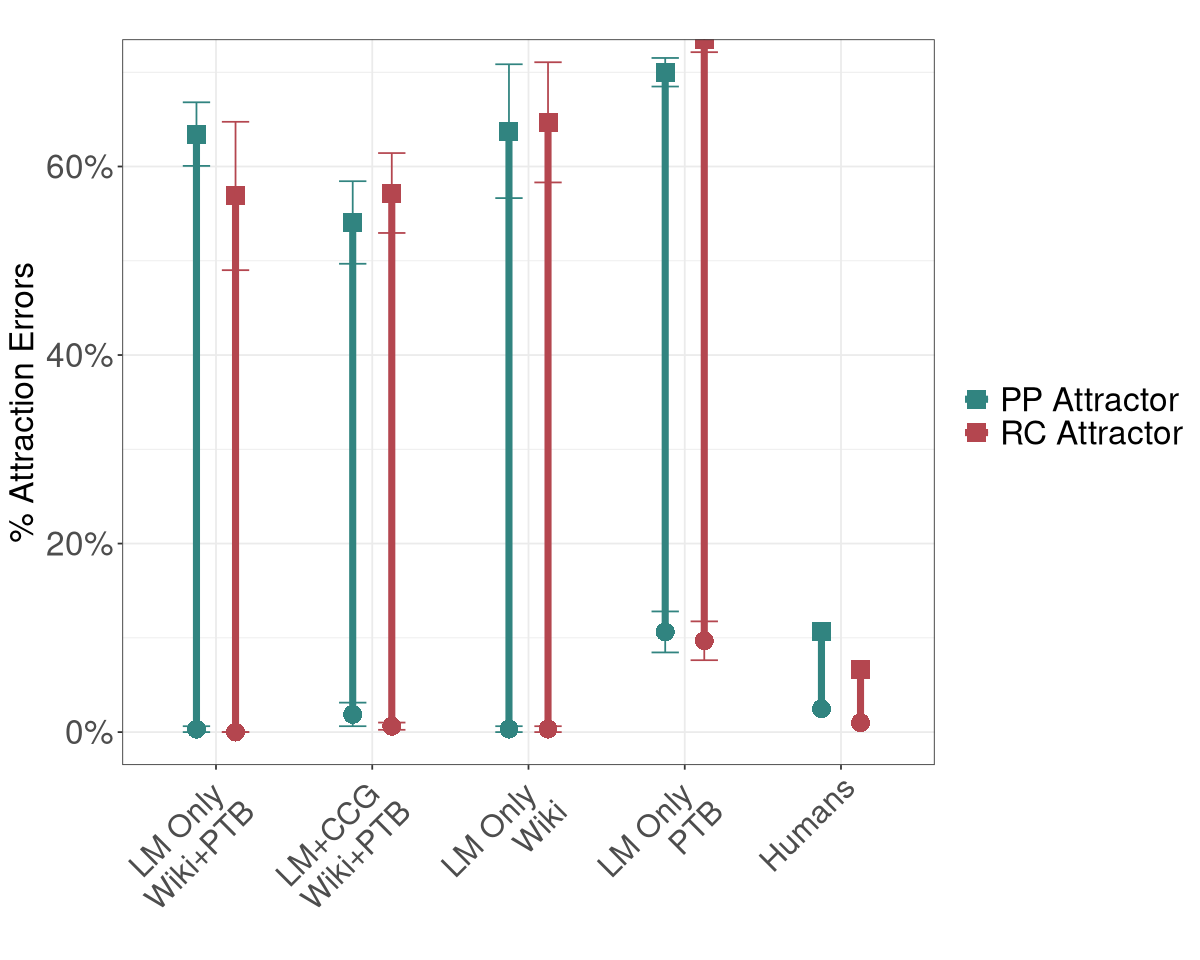

In [21]:
options(repr.plot.width=10, repr.plot.height=8)


ggplot(data=b92_df, aes(x=factor(type, levels=model_order), color=clause, y=max/100)) +
#geom_bar(stat="summary", fun = mean, fill="#566e4b", width=0.6) + 
geom_point(data=subset(means_human, match==TRUE), position=position_dodge(width=0.5), shape=16, size=5) +
geom_point(data=subset(means_human, match==FALSE), position=position_dodge(width=0.5), shape=15, size=5) + 
stat_summary(data=subset(means_m, match==TRUE), geom="errorbar", width=0.35, position=position_dodge(width=0.5), aes(x=type, group=clause)) +
stat_summary(data=subset(means_m, match==FALSE), geom="errorbar", width=0.35, position=position_dodge(width=0.5), aes(x=type, group=clause)) +
geom_line(data=means_human, position=position_dodge(width=0.5), size=2) +
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="", 
     color="", y="% Attraction Errors", title="") +
scale_y_continuous(labels=scales::percent) +
scale_color_manual(labels=c("prop"="PP Attractor", "rc"="RC Attractor"), values=pallete) +

scale_x_discrete(labels=c("l"="LM Only \nWiki+PTB",
                          "a"="LM+CCG \nWiki+PTB",
                          "w"="LM Only \nWiki",
                          "c"="LM Only \nPTB",
                          "h"="Humans")) +
coord_cartesian(ylim = c(0,0.7)) +
theme_bw() +
theme(axis.text.x=element_text(size=19, angle=45, hjust=1), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=17),
      strip.text=element_text(size=20), legend.text=element_text(size=20))


ggsave("plots/Bock_all_max.png", width= 10, height = 8)

In [58]:
b92_lm <- glmmTMB(data=subset(b92_df, type=="lmaug"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_lm)

b92_a <- glmmTMB(data=subset(b92_df, type=="augment"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_a)


b92_la <- glmmTMB(data=subset(b92_df, type=="lmaug" | type=="augment"), 
                  sample/100 ~ subj * match * clause * type + (1 | item) + (1 | model),
                 family=beta_family())

summary(b92_la)


b92_c <- glmmTMB(data=subset(b92_df, type=="ccglm"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_c)


b92_w <- glmmTMB(data=subset(b92_df, type=="wiki_lm"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_w)

b92_cw <- glmmTMB(data=subset(b92_df, type=="ccglm" | type=="wiki_lm"), 
                  sample/100 ~ subj * match * clause * type + (1 | item) + (1 | model),
                 family=beta_family())

summary(b92_cw)

b92_g <- glmmTMB(data=subset(b92_df, type=="gpt2"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_g)

 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "lmaug")

     AIC      BIC   logLik deviance df.resid 
 -1975.0  -1918.3    998.5  -1997.0     1269 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.04552  0.2134  
 model  (Intercept) 0.01014  0.1007  
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family (): 11.3 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.812136   0.064468  -12.60  < 2e-16 ***
subjs                -0.035455   0.037365   -0.95  0.34268    
match1                0.911044   0.026643   34.19  < 2e-16 ***
clause1               0.084150   0.025964    3.24  0.00119 ** 
subjs:match1          0.204516   0.037422    5.47 4.63e-08 ***
subjs:clause1        -0.026801   0.037301   -0.72  0.47245    
match1:clause1       -0.017054   0.025957   -0.66  0.51

 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "augment")

     AIC      BIC   logLik deviance df.resid 
 -1520.6  -1463.9    771.3  -1542.6     1269 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.06580  0.2565  
 model  (Intercept) 0.01924  0.1387  
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family ():  6.4 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.90888    0.08365 -10.865  < 2e-16 ***
subjs                 0.23294    0.04552   5.117 3.11e-07 ***
match1                0.78795    0.03286  23.976  < 2e-16 ***
clause1              -0.01038    0.03195  -0.325   0.7453    
subjs:match1          0.33748    0.04560   7.401 1.35e-13 ***
subjs:clause1        -0.07768    0.04548  -1.708   0.0876 .  
match1:clause1       -0.05132    0.03194  -1.607   0.1081   

 Family: beta  ( logit )
Formula:          
sample/100 ~ subj * match * clause * type + (1 | item) + (1 |      model)
Data: subset(b92_df, type == "lmaug" | type == "augment")

     AIC      BIC   logLik deviance df.resid 
 -3417.8  -3306.7   1727.9  -3455.8     2541 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.05396  0.2323  
 model  (Intercept) 0.01434  0.1198  
Number of obs: 2560, groups:  item, 32; model, 10

Dispersion parameter for beta family (): 8.11 

Conditional model:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -0.94961    0.07387 -12.855  < 2e-16 ***
subjs                           0.24048    0.04216   5.704 1.17e-08 ***
match1                          0.82436    0.02995  27.525  < 2e-16 ***
clause1                        -0.00849    0.02957  -0.287  0.77404    
typelmaug                       0.17555    0.08642   2.031  0.04222 *  
subjs:match1                  

 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "ccglm")

     AIC      BIC   logLik deviance df.resid 
  -971.4   -914.7    496.7   -993.4     1269 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.01452  0.1205  
 model  (Intercept) 0.00457  0.0676  
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family (): 4.74 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.195824   0.050495  -3.878 0.000105 ***
subjs                -0.281925   0.048785  -5.779 7.52e-09 ***
match1                0.848695   0.035152  24.144  < 2e-16 ***
clause1              -0.090709   0.034213  -2.651 0.008018 ** 
subjs:match1          0.052978   0.049055   1.080 0.280159    
subjs:clause1         0.193311   0.048730   3.967 7.28e-05 ***
match1:clause1       -0.090002   0.034241  -2.628 0.008

 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "wiki_lm")

     AIC      BIC   logLik deviance df.resid 
 -1865.3  -1808.6    943.6  -1887.3     1269 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.04879  0.2209  
 model  (Intercept) 0.04080  0.2020  
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family (): 9.91 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.851217   0.102343   -8.32  < 2e-16 ***
subjs                 0.160782   0.039202    4.10 4.11e-05 ***
match1                0.936318   0.028240   33.16  < 2e-16 ***
clause1              -0.054055   0.027386   -1.97   0.0484 *  
subjs:match1          0.220690   0.039398    5.60 2.12e-08 ***
subjs:clause1         0.115027   0.039146    2.94   0.0033 ** 
match1:clause1        0.008357   0.027384    0.31   0

 Family: beta  ( logit )
Formula:          
sample/100 ~ subj * match * clause * type + (1 | item) + (1 |      model)
Data: subset(b92_df, type == "ccglm" | type == "wiki_lm")

     AIC      BIC   logLik deviance df.resid 
 -2666.7  -2555.6   1352.4  -2704.7     2541 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.02262  0.1504  
 model  (Intercept) 0.01894  0.1376  
Number of obs: 2560, groups:  item, 32; model, 10

Dispersion parameter for beta family (): 6.28 

Conditional model:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -0.20952    0.07396  -2.833  0.00461 ** 
subjs                            -0.30177    0.04446  -6.787 1.14e-11 ***
match1                            0.90070    0.03160  28.500  < 2e-16 ***
clause1                          -0.09658    0.03110  -3.105  0.00190 ** 
typewiki_lm                      -0.56991    0.09784  -5.825 5.71e-09 ***
subjs:match1      

 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "gpt2")

     AIC      BIC   logLik deviance df.resid 
 -1002.4   -963.4    512.2  -1024.4      245 

Random effects:

Conditional model:
 Groups Name        Variance  Std.Dev. 
 item   (Intercept) 1.337e-01 0.3656000
 model  (Intercept) 4.535e-10 0.0000213
Number of obs: 256, groups:  item, 32; model, 1

Dispersion parameter for beta family (): 18.8 

Conditional model:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -3.01100    0.10880 -27.675  < 2e-16 ***
subjs                 0.11745    0.10309   1.139  0.25458    
match1                0.23445    0.07436   3.153  0.00162 ** 
clause1              -0.08153    0.07303  -1.116  0.26423    
subjs:match1          0.23859    0.10205   2.338  0.01939 *  
subjs:clause1         0.14834    0.10164   1.460  0.14442    
match1:clause1        0.04285    0.07317   0.586  0.55813 

In [41]:
pval_string <- function(p) {
    if (p < 0.001) {
        return ("p < 0.001 ***")
    } else if (p < 0.01) {
        return ("p < 0.01 *")
    } else if (p < 0.05) {
        return ("p < 0.05 *")
    }
    else {return(paste0("p = ", round(p,2)))}
}

stats_strings <- function(model) {
    x <- coef(summary(b92_a))$cond
    for(i in rownames(x)) {
        y <- x[i,]
        print(paste0(i, ": ",
                    "\beta = ",round(y[["Estimate"]], 2), 
                    ", |z| = ", round(y[["z value"]], 2), 
                    ", ", pval_string(y[["Pr(>|z|)"]])
        ))
    }
}

In [ ]:
stats_strings(ma)

# Haskell & Macdonald 2011

In [26]:
hm_wiki_df <- read.csv("../evalsets/HaskellMacdonald2011/items.csv.reformat")
hm_ptb_df <- read.csv("../evalsets/HaskellMacdonald2011/items.ptb.csv.reformat")


hm_df <- rbind(hm_wiki_df, hm_ptb_df)

hm_df$type <- substr(hm_df$model,5, nchar(hm_df$model) -1)
hm_df[hm_df$model == "gpt2",]$type <- "gpt2"
hm_df$type <- as.factor(hm_df$type)
hm_df$condition <- as.factor(hm_df$condition)

contrasts(hm_df$condition)

coding_matrix <- matrix(c(1, -1), ncol=1)
contrasts(hm_df$condition) <- coding_matrix



hm_df

,SP
PS,0
SP,1


X,item,condition,model,max,sample,type
<int>,<int>,<fct>,<chr>,<int>,<dbl>,<fct>
0,0,SP,lstmlmaug0,100,63.14754,lmaug
1,0,SP,lstmlmaug1,100,96.87451,lmaug
2,0,SP,lstmlmaug2,100,89.00968,lmaug
3,0,SP,lstmlmaug3,100,97.68149,lmaug
4,0,SP,lstmlmaug4,100,98.83878,lmaug
5,0,SP,lstmaugment0,100,95.45648,augment
6,0,SP,lstmaugment1,100,99.32236,augment
7,0,SP,lstmaugment2,100,99.16819,augment
8,0,SP,lstmaugment3,100,98.91358,augment


In [27]:
output <- hm_df %>% group_by("type"=type, "order"=condition) %>% summarize("sample"=mean(sample), "max" = mean(max))
hm_means_m <- hm_df %>% group_by("model"=model, "type"=type, "order"=condition) %>% summarize("sample"=mean(sample), "max" = mean(max))

hm_means_m <- subset(hm_means_m, !(type %in% ignore))

hm_human <- data.frame(type=c("h", "h"),
                       order=c("SP", "PS"),
                       sample=c(98, 28))

hm_human$max = hm_human$sample

hm_means <- rbind(output, hm_human)
hm_means <- subset(hm_means, !(hm_means$type %in% ignore))

output

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'model', 'type'. You can override using the `.groups` argument.


type,order,sample,max
<fct>,<fct>,<dbl>,<dbl>
augment,PS,70.60683,82.500
augment,SP,90.06662,98.500
augment_tied,PS,75.52375,89.375
augment_tied,SP,88.54398,98.125
ccglm,PS,46.77698,45.000
ccglm,SP,74.70550,82.000
gpt2,PS,69.86759,90.000
gpt2,SP,93.25826,100.000
lmaug,PS,78.03385,93.500


[1] "lmaug"   "augment" "wiki_lm" "ccglm"   "gpt2"    "h"

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



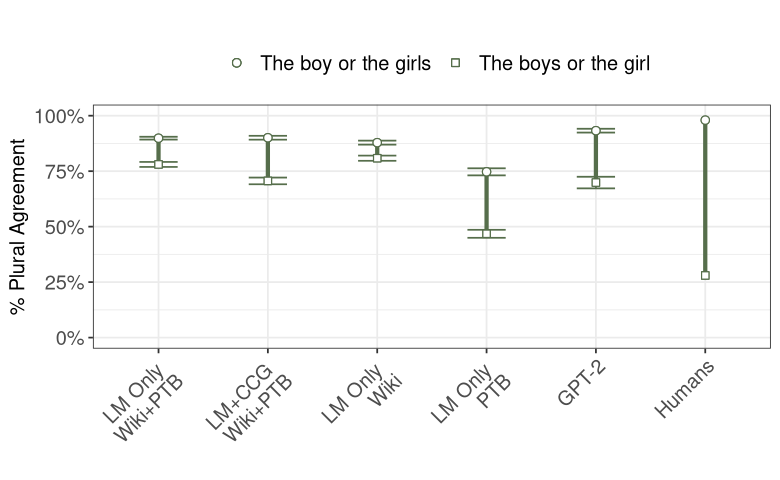

In [28]:
options(repr.plot.width=6.5, repr.plot.height=4)


hm_df <- subset(hm_df, !(type %in% ignore))
model_order = c("lmaug", "augment", "wiki_lm", "ccglm", "gpt2", "h")
hm_df$type <- factor(hm_df$type, levels=model_order)
hm_means$type <- factor(hm_means$type, levels=model_order)
levels(hm_means$type)

ggplot(data=hm_means, aes(x=type, y=sample/100)) +
geom_point(data=subset(hm_means, order=="SP"), aes(shape="m"), size=2, color="#566e4b") +
geom_point(data=subset(hm_means, order=="PS"), aes(shape="mm"), size=2, color="#566e4b") + 
stat_summary(data=subset(hm_df, condition=="SP"), geom="errorbar", width=0.35, 
                         aes(x=type, group=condition), color="#566e4b") +
stat_summary(data=subset(hm_df, condition=="PS"), geom="errorbar", width=0.35,  
                         aes(x=type, group=condition), color="#566e4b") +
geom_line(data=hm_means, position=position_dodge(width=0.5), size=1.2, color="#566e4b") +
geom_point(data=subset(hm_means, order=="SP"), aes(shape="m"), size=2, color="#566e4b", fill="#FFFFFF") +
geom_point(data=subset(hm_means, order=="PS"), aes(shape="mm"), size=2, color="#566e4b", fill="#FFFFFF") + 
labs(x="", 
     color="", shape="", y="% Plural Agreement", title="") +
scale_y_continuous(labels=scales::percent) +
scale_x_discrete(labels=c("lmaug"="LM Only \nWiki+PTB",
                          "augment"="LM+CCG \nWiki+PTB",
                          "wiki_lm"="LM Only \nWiki",
                          "ccglm"="LM Only \nPTB",
                          "gpt2"="GPT-2",
                          "h"="Humans")) +
scale_shape_manual(labels=c("m"="The boy or the girls",
                            "mm"="The boys or the girl"),
                   values=c("m"=21,
                            "mm"=22)) +
coord_cartesian(ylim = c(0,1.0)) +
theme_bw() +
theme(axis.text.x=element_text(size=12, angle=45, hjust=1), axis.text.y=element_text(size=12),
      axis.title.y=element_text(size=12), axis.title.x=element_text(size=10),
      strip.text=element_text(size=12), legend.text=element_text(size=12), legend.position="top")


ggsave("plots/Haskell_all.png", width= 6.5, height = 4)

In [80]:
hm_lm <- glmmTMB(data=subset(hm_df, hm_df$type == "lmaug"), 
                 sample/100 ~ condition  + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)

hm_lm <- glmmTMB(data=subset(hm_df, hm_df$type == "augment"), 
                 sample/100 ~ condition  + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)

hm_lm <- glmmTMB(data=hm_df, 
                 sample/100 ~ condition * type + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)
hm_lm <- glmmTMB(data=subset(hm_df, type == "wiki_lm" | type == "ccglm"), 
                 sample/100 ~ condition * type + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)

hm_lm <- glmmTMB(data=subset(hm_df, type == "gpt2"), 
                 sample/100 ~ condition + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)

 Family: beta  ( logit )
Formula:          sample/100 ~ condition + (1 | item) + (1 | model)
Data: subset(hm_df, hm_df$type == "lmaug")

     AIC      BIC   logLik deviance df.resid 
  -804.5   -784.6    407.3   -814.5      395 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.08607  0.2934  
 model  (Intercept) 0.09840  0.3137  
Number of obs: 400, groups:  item, 40; model, 5

Dispersion parameter for beta family (): 11.4 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.74927    0.15361   11.39   <2e-16 ***
condition1  -0.43121    0.03841  -11.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: beta  ( logit )
Formula:          sample/100 ~ condition + (1 | item) + (1 | model)
Data: subset(hm_df, hm_df$type == "augment")

     AIC      BIC   logLik deviance df.resid 
  -641.6   -621.6    325.8   -651.6      395 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.03805  0.1951  
 model  (Intercept) 0.10327  0.3214  
Number of obs: 400, groups:  item, 40; model, 5

Dispersion parameter for beta family (): 6.39 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.4869     0.1551   9.586   <2e-16 ***
condition1   -0.5790     0.0451 -12.838   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: beta  ( logit )
Formula:          sample/100 ~ condition * type + (1 | item) + (1 | model)
Data: hm_df

     AIC      BIC   logLik deviance df.resid 
 -2946.8  -2862.8   1488.4  -2976.8     1985 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.07690  0.2773  
 model  (Intercept) 0.07084  0.2662  
Number of obs: 2000, groups:  item, 40; model, 25

Dispersion parameter for beta family (): 6.55 

Conditional model:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.497808   0.134259  11.156  < 2e-16 ***
condition1                  -0.582667   0.042958 -13.564  < 2e-16 ***
typeaugment_tied            -0.003239   0.189612  -0.017 0.986370    
typeccglm                   -0.987788   0.177988  -5.550 2.86e-08 ***
typegpt2                     0.005238   0.309934   0.017 0.986517    
typelmaug                    0.101918   0.178892   0.570 0.568870    
typewiki_lm                  0.09769

 Family: beta  ( logit )
Formula:          sample/100 ~ condition * type + (1 | item) + (1 | model)
Data: subset(hm_df, type == "wiki_lm" | type == "ccglm")

     AIC      BIC   logLik deviance df.resid 
  -895.9   -863.1    455.0   -909.9      793 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.20588  0.4537  
 model  (Intercept) 0.03963  0.1991  
Number of obs: 800, groups:  item, 40; model, 10

Dispersion parameter for beta family (): 5.55 

Conditional model:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)             0.48015    0.12144   3.954 7.69e-05 ***
condition1             -0.66324    0.04111 -16.131  < 2e-16 ***
typewiki_lm             1.08888    0.14096   7.725 1.12e-14 ***
condition1:typewiki_lm  0.46280    0.06095   7.593 3.12e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: beta  ( logit )
Formula:          sample/100 ~ condition + (1 | item) + (1 | model)
Data: subset(hm_df, type == "gpt2")

     AIC      BIC   logLik deviance df.resid 
  -156.7   -144.8     83.4   -166.7       75 

Random effects:

Conditional model:
 Groups Name        Variance  Std.Dev. 
 item   (Intercept) 1.287e-09 3.588e-05
 model  (Intercept) 5.888e-18 2.426e-09
Number of obs: 80, groups:  item, 40; model, 1

Dispersion parameter for beta family (): 10.9 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.60572    0.09113  17.621   <2e-16 ***
condition1  -0.74862    0.08611  -8.694   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Franck 2002

In [5]:
franck_wiki_df <- read.csv('../evalsets/Franck2002/items.csv.reformat')
franck_ptb_df <- read.csv('../evalsets/Franck2002/items.ptb.csv.reformat')

franck_df = rbind(franck_wiki_df, franck_ptb_df)

franck_df <- tidyr::separate(franck_df, condition, c("subj", "inter", "local"), sep=1:3)
franck_df$sample <- 100 - franck_df$sample
franck_df$max <- 100 - franck_df$max

franck_df$inter_match <- as.factor(franck_df$subj == franck_df$inter)
franck_df$local_match <- as.factor(franck_df$subj == franck_df$local)
franck_df$type = substr(franck_df$model, 5, nchar(franck_df$model) -1)
franck_df[franck_df$model == "gpt2",]$type <- "gpt2"
franck_df$type <- as.factor(franck_df$type)

contrasts(franck_df$local_match) <- coding_matrix
contrasts(franck_df$inter_match) <- coding_matrix

franck_df
summary(franck_df)

X,item,subj,inter,local,model,max,sample,inter_match,local_match,type
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
0,0,S,S,S,lstmlmaug0,0,10.2915992,TRUE,TRUE,lmaug
1,0,S,S,S,lstmlmaug1,0,6.0674431,TRUE,TRUE,lmaug
2,0,S,S,S,lstmlmaug2,0,12.4142790,TRUE,TRUE,lmaug
3,0,S,S,S,lstmlmaug3,0,9.5790435,TRUE,TRUE,lmaug
4,0,S,S,S,lstmlmaug4,0,4.7635138,TRUE,TRUE,lmaug
5,0,S,S,S,lstmaugment0,0,5.3858561,TRUE,TRUE,augment
6,0,S,S,S,lstmaugment1,0,5.3871004,TRUE,TRUE,augment
7,0,S,S,S,lstmaugment2,0,4.5887376,TRUE,TRUE,augment
8,0,S,S,S,lstmaugment3,0,6.5435971,TRUE,TRUE,augment


       X               item           subj              inter          
 Min.   :   0.0   Min.   : 0.00   Length:6400        Length:6400       
 1st Qu.: 799.8   1st Qu.: 7.75   Class :character   Class :character  
 Median :1919.5   Median :15.50   Mode  :character   Mode  :character  
 Mean   :2175.5   Mean   :15.50                                        
 3rd Qu.:3519.2   3rd Qu.:23.25                                        
 Max.   :5119.0   Max.   :31.00                                        
    local              model                max             sample       
 Length:6400        Length:6400        Min.   :  0.00   Min.   : 0.2074  
 Class :character   Class :character   1st Qu.:  0.00   1st Qu.:12.4522  
 Mode  :character   Mode  :character   Median :  0.00   Median :28.7829  
                                       Mean   : 29.47   Mean   :35.1772  
                                       3rd Qu.:100.00   3rd Qu.:55.1728  
                                       Max.   :100.0

In [6]:
franck_means <- franck_df %>% group_by(type, inter_match, local_match) %>% 
                       summarize(sample = mean(sample), max = mean(max))
franck_means_m <- franck_df %>% group_by(model, type, inter_match, local_match) %>% 
                       summarize(sample = mean(sample), max = mean(max))

franck_human <- data.frame(type=rep(c("h"), 8),
                           subj=rep(c("S","P"), each=4),
                           inter=rep(c("S", "S", "P", "P"), times=2),
                           local=rep(c("S", "P"), times=4),
                           sample=c(1.3, 0, 9.8, 4.5, 5.8, 9.4, 3.1, 1.3))

franck_human$inter_match <- as.factor(franck_human$inter == franck_human$subj)
franck_human$local_match <- as.factor(franck_human$local == franck_human$subj)

franck_human$max <- franck_human$sample

franck_human <- franck_human %>% group_by(type, inter_match, local_match) %>% 
                       summarize(sample = mean(sample), max = mean(max))


franck_means <- rbind(franck_means, franck_human)

franck_means <- subset(franck_means, !(franck_means$type %in% ignore))
franck_means_m <- subset(franck_means_m, !(franck_means_m$type %in% ignore))
franck_means

`summarise()` has grouped output by 'type', 'inter_match'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'model', 'type', 'inter_match'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'type', 'inter_match'. You can override using the `.groups` argument.


type,inter_match,local_match,sample,max
<chr>,<fct>,<fct>,<dbl>,<dbl>
augment,FALSE,FALSE,55.435672,64.0625
augment,FALSE,TRUE,20.448687,4.3750
augment,TRUE,FALSE,41.522017,35.0000
augment,TRUE,TRUE,11.413217,0.6250
ccglm,FALSE,FALSE,71.108421,81.8750
ccglm,FALSE,TRUE,34.250346,25.3125
ccglm,TRUE,FALSE,60.624970,68.4375
ccglm,TRUE,TRUE,24.710893,16.2500
gpt2,FALSE,FALSE,9.201792,0.0000


No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, d

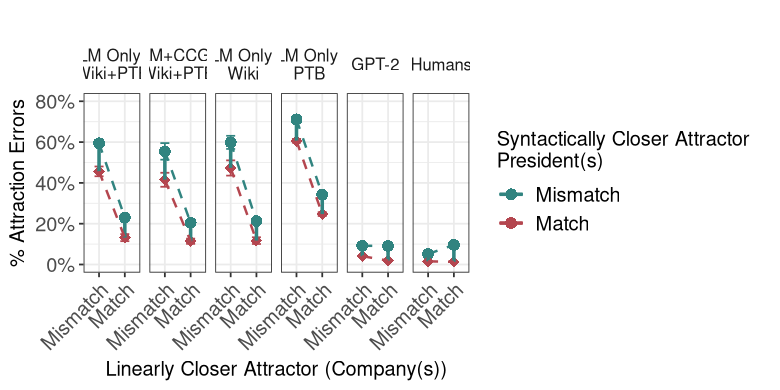

In [7]:
library(repr)
options(repr.plot.width=6.5, repr.plot.height=3.25)

model_order = c("lmaug", "augment", "wiki_lm", "ccglm", "gpt2", "h")

plt_1 <- ggplot(data=franck_means, aes(x=local_match, color=inter_match, group=local_match, y=sample/100)) +
facet_grid(~factor(type, levels=model_order), labeller=as_labeller(c("lmaug"="LM Only \nWiki+PTB",
                          "augment"="LM+CCG \nWiki+PTB",
                          "wiki_lm"="LM Only \nWiki",
                          "ccglm"="LM Only \nPTB",
                          "gpt2"="GPT-2",
                          "h"="Humans")))+
geom_point(data=subset(franck_means, inter_match==FALSE),
           shape=16, size=3) + 
geom_point(data=subset(franck_means, inter_match==TRUE),
           shape=18, size=3) + 
stat_summary(data=subset(franck_means_m, inter_match==TRUE), geom="errorbar", width=0.35, position=position_dodge(width=0.7)) +
stat_summary(data=subset(franck_means_m, inter_match==FALSE), geom="errorbar", width=0.35, position=position_dodge(width=0.7)) +
geom_line(data=franck_means, 
          size=1) +
geom_line(data=franck_means,
          aes(color=inter_match, group=inter_match), 
          linetype="dashed", size=0.7) +
labs(x="Linearly Closer Attractor (Company(s))", 
     color="Syntactically Closer Attractor \nPresident(s)", y="% Attraction Errors", title="") +
scale_y_continuous(labels=scales::percent) +
scale_color_manual(labels=c("Mismatch", 
                        "Match"), values=pallete) +
scale_shape_manual(labels=c("LM+CCG", 
                        "LM Only"), values=pallete) +
scale_x_discrete(labels=c("FALSE"="Mismatch", "TRUE"="Match")) +
coord_cartesian(ylim = c(0,0.8)) +
theme_bw() +
theme(axis.text.x=element_text(size=12, angle=45, hjust=1), axis.text.y=element_text(size=12),
      axis.title.y=element_text(size=12), axis.title.x=element_text(size=12),
      strip.text=element_text(size=10), legend.text=element_text(size=12), 
      legend.title=element_text(size=12), strip.background=element_rect(fill="white", linetype=0), 
      strip.placement="outside")

plt_1
ggsave("plots/Franck_all.png", width=6.5, height=3.25)

In [8]:
franck_inter <- franck_means %>% 
                group_by(type, inter_match) %>% 
                summarize(sample = mean(sample), max = mean(max), position="inter", match=inter_match)
franck_local <- franck_means %>% 
                group_by(type, local_match) %>% 
                summarize(sample = mean(sample), max = mean(max), position="local", match=local_match)

franck_bypos <- rbind(franck_inter, franck_local)


franck_bypos$position <- as.factor(franck_bypos$position)

franck_bypos$match <- as.logical(franck_bypos$match)

franck_inter_m <- franck_means_m %>% 
                group_by(model, type, inter_match) %>% 
                summarize(sample = mean(sample), max = mean(max), position="inter", match=inter_match)
franck_local_m <- franck_means_m %>% 
                group_by(model, type, local_match) %>% 
                summarize(sample = mean(sample), max = mean(max), position="local", match=local_match)

franck_bypos_m <- rbind(franck_inter_m, franck_local_m)


franck_bypos_m$position <- as.factor(franck_bypos_m$position)

franck_bypos_m$match <- as.logical(franck_bypos_m$match)


`summarise()` has grouped output by 'type', 'inter_match'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'type', 'local_match'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'model', 'type', 'inter_match'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'model', 'type', 'local_match'. You can override using the `.groups` argument.


No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, d

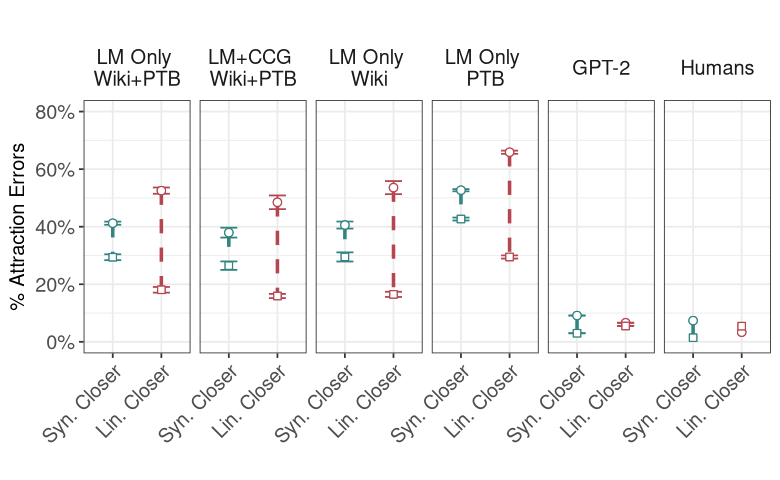

In [9]:
library(repr)
options(repr.plot.width=6.5, repr.plot.height=4)

pallete3 = c("#318480", "#b4464f")

model_order = c("lmaug", "augment", "wiki_lm", "ccglm", "gpt2", "h")

plt_1 <- ggplot(data=franck_bypos, aes(x=position, color=position, y=sample/100)) +
facet_grid(~factor(type, levels=model_order), labeller=as_labeller(c("lmaug"="LM Only \nWiki+PTB",
                          "augment"="LM+CCG \nWiki+PTB",
                          "wiki_lm"="LM Only \nWiki",
                          "ccglm"="LM Only \nPTB",
                          "gpt2"="GPT-2",
                          "h"="Humans")))+
geom_point(data=subset(franck_bypos, match==FALSE),
           shape=21, size=0, fill="#FFFFFF") + 
stat_summary(data=subset(franck_bypos_m, match==TRUE), geom="errorbar", width=0.35, 
             position=position_dodge(width=0.7)) +
stat_summary(data=subset(franck_bypos_m, match==FALSE), geom="errorbar", width=0.35, 
             position=position_dodge(width=0.7)) +
geom_line(data=franck_bypos,
          aes(color=position), 
          linetype="dashed", size=1) +
geom_point(data=subset(franck_bypos, match==FALSE),
           shape=21, size=2, fill="#FFFFFF") + 
geom_point(data=subset(franck_bypos, match==TRUE),
           shape=22, size=2, fill="#FFFFFF") + 
labs(x="", 
     color="", y="% Attraction Errors", title="") +
scale_y_continuous(labels=scales::percent) +
scale_color_manual(labels=c("FALSE"="Mismatch", 
                        "TRUE"="Match"), values=pallete) +
scale_x_discrete(labels=c("inter"="Syn. Closer", "local"="Lin. Closer")) +
coord_cartesian(ylim = c(0,0.8)) +
theme_bw() +
theme(axis.text.x=element_text(size=12, angle=45, hjust=1), axis.text.y=element_text(size=12),
      axis.title.y=element_text(size=12), axis.title.x=element_text(size=10),
      strip.text=element_text(size=12), legend.text=element_text(size=12), 
      legend.title=element_text(size=12), strip.background=element_rect(fill="white", linetype=0), 
      strip.placement="outside", legend.position="none")

plt_1
ggsave("plots/Franck_eff_all.png", width=6.5, height=4)

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



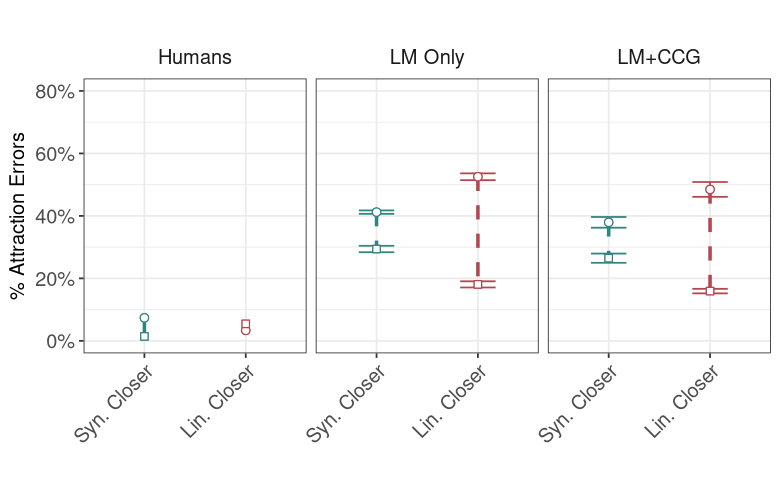

In [15]:
library(repr)
options(repr.plot.width=6.5, repr.plot.height=4)

pallete3 = c("#318480", "#b4464f")

model_order = c("h", "lmaug", "augment")

plt_1 <- ggplot(data=subset(franck_bypos, type %in% model_order), aes(x=position, color=position, y=sample/100)) +
facet_grid(~factor(type, levels=model_order), labeller=as_labeller(c("lmaug"="LM Only",
                          "augment"="LM+CCG",
                          "wiki_lm"="LM Only \nWiki",
                          "ccglm"="LM Only \nPTB",
                          "gpt2"="GPT-2",
                          "h"="Humans")))+
geom_point(data=subset(franck_bypos, (match==FALSE) &(type %in% model_order)),
           shape=21, size=0, fill="#FFFFFF") + 
stat_summary(data=subset(franck_bypos_m, (match==TRUE) &(type %in% model_order)), geom="errorbar", width=0.35, 
             position=position_dodge(width=0.7)) +
stat_summary(data=subset(franck_bypos_m, (match==FALSE) &(type %in% model_order)), geom="errorbar", width=0.35, 
             position=position_dodge(width=0.7)) +
geom_line(data=subset(franck_bypos,type %in% model_order),
          aes(color=position), 
          linetype="dashed", size=1) +
geom_point(data=subset(franck_bypos, (match==FALSE) &(type %in% model_order)),
           shape=21, size=2, fill="#FFFFFF") + 
geom_point(data=subset(franck_bypos, (match==TRUE) &(type %in% model_order)),
           shape=22, size=2, fill="#FFFFFF") + 
labs(x="", 
     color="", y="% Attraction Errors", title="") +
scale_y_continuous(labels=scales::percent) +
scale_color_manual(labels=c("FALSE"="Mismatch", 
                        "TRUE"="Match"), values=pallete) +
scale_x_discrete(labels=c("inter"="Syn. Closer", "local"="Lin. Closer")) +
coord_cartesian(ylim = c(0,0.8)) +
theme_bw() +
theme(axis.text.x=element_text(size=12, angle=45, hjust=1), axis.text.y=element_text(size=12),
      axis.title.y=element_text(size=12), axis.title.x=element_text(size=10),
      strip.text=element_text(size=12), legend.text=element_text(size=12), 
      legend.title=element_text(size=12), strip.background=element_rect(fill="white", linetype=0), 
      strip.placement="outside", legend.position="none")

plt_1
ggsave("plots/Franck_eff_lmccglmonly.png", width=4.5, height=4)

In [104]:
#LM-Only
franck_lm <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), subset(franck_df, type=="lmaug"), 
                   family=beta_family())

summary(franck_lm)

# Hack together a linear hypothesis test for a glmmTMB model with hypothesis inter_match = local_match
hypothesis= c(0,1,-1,0)
linearHypothesis(franck_lm, hypothesis, 
                 vcov. =vcov(franck_lm)[["cond"]], 
                 coef. =fixef(franck_lm)[["cond"]])

 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: subset(franck_df, type == "lmaug")

     AIC      BIC   logLik deviance df.resid 
 -1539.6  -1503.6    776.8  -1553.6     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.01723  0.13127 
 model  (Intercept) 0.00489  0.06993 
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family (): 8.57 

Conditional model:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.680353   0.043983  -15.47   <2e-16 ***
inter_match1               0.289337   0.019983   14.48   <2e-16 ***
local_match1               0.791469   0.020552   38.51   <2e-16 ***
inter_match1:local_match1 -0.001195   0.019906   -0.06    0.952    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,1274,NA,NA,NA
2,1273,1,336.2132,4.261597e-75


In [137]:
# LM+CCG
franck_aug <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), subset(franck_df, type=="augment"), 
                   family=beta_family())
summary(franck_aug)

hypothesis= c(0,1,-1,0)
linearHypothesis(franck_aug, hypothesis, 
                 vcov. =vcov(franck_aug)[["cond"]], 
                 coef. =fixef(franck_aug)[["cond"]])


 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: subset(franck_df, type == "a")

     AIC      BIC   logLik deviance df.resid 
 -1522.6  -1486.5    768.3  -1536.6     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.01229  0.1108  
 model  (Intercept) 0.04507  0.2123  
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family (): 7.36 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.83517    0.09949   -8.39   <2e-16 ***
inter_match1               0.29444    0.02148   13.71   <2e-16 ***
local_match1               0.76740    0.02224   34.51   <2e-16 ***
inter_match1:local_match1 -0.00459    0.02137   -0.21     0.83    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,1274,NA,NA,NA
2,1273,1,254.4725,2.750566e-57


In [144]:
franck_la_df <- droplevels(subset(franck_df, type=="a" | type=="l"))
summary(franck_la_df)
franck_both <- glmmTMB(sample/100 ~ inter_match * local_match*type + (1 | item) 
                  + (1 | model), data=franck_la_df, 
                   family=beta_family())
summary(franck_both)

       X               item           subj              inter          
 Min.   :   0.0   Min.   : 0.00   Length:2560        Length:2560       
 1st Qu.: 958.5   1st Qu.: 7.75   Class :character   Class :character  
 Median :1917.0   Median :15.50   Mode  :character   Mode  :character  
 Mean   :1917.0   Mean   :15.50                                        
 3rd Qu.:2875.5   3rd Qu.:23.25                                        
 Max.   :3834.0   Max.   :31.00                                        
    local              model                max             sample       
 Length:2560        Length:2560        Min.   :  0.00   Min.   : 0.2786  
 Class :character   Class :character   1st Qu.:  0.00   1st Qu.:12.7403  
 Mode  :character   Mode  :character   Median :  0.00   Median :28.2233  
                                       Mean   : 27.03   Mean   :33.7553  
                                       3rd Qu.:100.00   3rd Qu.:52.3324  
                                       Max.   :100.0

 Family: beta  ( logit )
Formula:          sample/100 ~ inter_match * local_match * type + (1 | item) +  
    (1 | model)
Data: franck_la_df

     AIC      BIC   logLik deviance df.resid 
 -3069.6  -3005.3   1545.8  -3091.6     2549 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.01565  0.1251  
 model  (Intercept) 0.02563  0.1601  
Number of obs: 2560, groups:  item, 32; model, 10

Dispersion parameter for beta family (): 7.93 

Conditional model:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            0.22384    0.08372   2.674   0.0075 ** 
inter_matchTRUE                       -0.58485    0.05308 -11.018   <2e-16 ***
local_matchTRUE                       -1.54408    0.05738 -26.912   <2e-16 ***
typel                                  0.17199    0.11434   1.504   0.1325    
inter_matchTRUE:local_matchTRUE       -0.02596    0.08329  -0.312   0.7553    
inter_matchTRUE:typel  

In [138]:
# LM PTB
franck_ptb <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), subset(franck_df, type=="c"), 
                   family=beta_family())
summary(franck_ptb)
hypothesis= c(0,1,-1,0)
linearHypothesis(franck_ptb, hypothesis, 
                 vcov. =vcov(franck_ptb)[["cond"]], 
                 coef. =fixef(franck_ptb)[["cond"]])


 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: subset(franck_df, type == "c")

     AIC      BIC   logLik deviance df.resid 
  -652.1   -616.0    333.1   -666.1     1273 

Random effects:

Conditional model:
 Groups Name        Variance  Std.Dev. 
 item   (Intercept) 9.629e-11 9.813e-06
 model  (Intercept) 2.499e-11 4.999e-06
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family (): 3.77 

Conditional model:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.103944   0.025910  -4.012 6.03e-05 ***
inter_match1               0.208424   0.025982   8.022 1.04e-15 ***
local_match1               0.731804   0.026933  27.171  < 2e-16 ***
inter_match1:local_match1  0.002115   0.025886   0.082    0.935    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,1274,NA,NA,NA
2,1273,1,205.8207,1.121289e-46


In [139]:
# LM Wiki
franck_wiki <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), subset(franck_df, type=="w"), 
                   family=beta_family())
summary(franck_wiki)
hypothesis= c(0,1,-1,0)
linearHypothesis(franck_wiki, hypothesis, 
                 vcov. =vcov(franck_wiki)[["cond"]], 
                 coef. =fixef(franck_wiki)[["cond"]])


 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: subset(franck_df, type == "w")

     AIC      BIC   logLik deviance df.resid 
 -1553.0  -1516.9    783.5  -1567.0     1273 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.02838  0.1685  
 model  (Intercept) 0.04275  0.2068  
Number of obs: 1280, groups:  item, 32; model, 5

Dispersion parameter for beta family (): 8.43 

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.6985352  0.0993814   -7.03 2.08e-12 ***
inter_match1               0.2562577  0.0202610   12.65  < 2e-16 ***
local_match1               0.8479778  0.0211654   40.06  < 2e-16 ***
inter_match1:local_match1 -0.0005342  0.0202011   -0.03    0.979    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,1274,NA,NA,NA
2,1273,1,442.6374,2.887028e-98


In [145]:
franck_la_df <- droplevels(subset(franck_df, type=="c" | type=="w"))
summary(franck_la_df)
franck_both <- glmmTMB(sample/100 ~ inter_match * local_match*type + (1 | item) 
                  + (1 | model), data=franck_la_df, 
                   family=beta_family())
summary(franck_both)

       X               item           subj              inter          
 Min.   :   0.0   Min.   : 0.00   Length:2560        Length:2560       
 1st Qu.: 479.8   1st Qu.: 7.75   Class :character   Class :character  
 Median : 959.5   Median :15.50   Mode  :character   Mode  :character  
 Mean   :1282.0   Mean   :15.50                                        
 3rd Qu.:1921.8   3rd Qu.:23.25                                        
 Max.   :3839.0   Max.   :31.00                                        
    local              model                max             sample      
 Length:2560        Length:2560        Min.   :  0.00   Min.   : 1.227  
 Class :character   Class :character   1st Qu.:  0.00   1st Qu.:15.306  
 Mode  :character   Mode  :character   Median :  0.00   Median :35.934  
                                       Mean   : 38.59   Mean   :41.354  
                                       3rd Qu.:100.00   3rd Qu.:67.215  
                                       Max.   :100.00   Ma

 Family: beta  ( logit )
Formula:          sample/100 ~ inter_match * local_match * type + (1 | item) +  
    (1 | model)
Data: franck_la_df

     AIC      BIC   logLik deviance df.resid 
 -1982.9  -1918.6   1002.5  -2004.9     2549 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.001025 0.03202 
 model  (Intercept) 0.016160 0.12712 
Number of obs: 2560, groups:  item, 32; model, 10

Dispersion parameter for beta family (): 5.05 

Conditional model:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            0.902107   0.074494  12.110  < 2e-16 ***
inter_matchTRUE                       -0.455058   0.065940  -6.901 5.16e-12 ***
local_matchTRUE                       -1.578859   0.067121 -23.523  < 2e-16 ***
typew                                 -0.526279   0.103916  -5.064 4.10e-07 ***
inter_matchTRUE:local_matchTRUE        0.008786   0.094201   0.093    0.926    
inter_matchTRUE:t

In [105]:
# gpt2
franck_gpt2 <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), subset(franck_df, type=="gpt2"), 
                   family=beta_family())
summary(franck_gpt2)
hypothesis= c(0,1,-1,0)
linearHypothesis(franck_gpt2, hypothesis, 
                 vcov. =vcov(franck_gpt2)[["cond"]], 
                 coef. =fixef(franck_gpt2)[["cond"]])


 Family: beta  ( logit )
Formula:          
sample/100 ~ inter_match * local_match + (1 | item) + (1 | model)
Data: subset(franck_df, type == "gpt2")

     AIC      BIC   logLik deviance df.resid 
  -980.7   -955.8    497.3   -994.7      249 

Random effects:

Conditional model:
 Groups Name        Variance  Std.Dev. 
 item   (Intercept) 9.635e-02 3.104e-01
 model  (Intercept) 3.308e-10 1.819e-05
Number of obs: 256, groups:  item, 32; model, 1

Dispersion parameter for beta family (): 26.9 

Conditional model:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -2.84064    0.07731  -36.75  < 2e-16 ***
inter_match1               0.41144    0.04633    8.88  < 2e-16 ***
local_match1               0.10824    0.04480    2.42  0.01570 *  
inter_match1:local_match1 -0.12999    0.04479   -2.90  0.00371 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,250,NA,NA,NA
2,249,1,24.13982,8.958863e-07
